In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('MA_ppe_update.csv', index_col='Time', parse_dates=True)
df.head(50)

,Region,Entity,N95s/KN95s,Masks,Gowns,Gloves,Ventilators
Time,,,,,,,
2020-04-29,Massachusetts,Nursing home/Senior living,267285,600400,53525,489100,0
2020-04-29,Massachusetts,Hospital,200000,165200,21436,104000,675
2020-04-29,Massachusetts,Community health center,44550,69750,8013,53400,0
2020-04-29,Massachusetts,"Local Municipalities (e.g. Fire, Police, Publi...",122634,282141,119532,1060650,0
2020-04-29,Massachusetts,Public safety (30-day supply),167325,0,0,0,0
2020-04-29,Massachusetts,EMS (Private),29520,18300,1668,34000,0
2020-04-29,Massachusetts,Local BOH,10325,19500,786,38000,0
2020-04-29,Massachusetts,State agency,44376,166258,31265,1371080,0
2020-04-29,Massachusetts,Other (e.g. home and pediatric care),104811,541863,49570,837054,0


# Massachusetts

In [3]:
MA = df[df['Region']=='Massachusetts']
MA

,Region,Entity,N95s/KN95s,Masks,Gowns,Gloves,Ventilators
Time,,,,,,,
2020-04-29,Massachusetts,Nursing home/Senior living,267285,600400,53525,489100,0
2020-04-29,Massachusetts,Hospital,200000,165200,21436,104000,675
2020-04-29,Massachusetts,Community health center,44550,69750,8013,53400,0
2020-04-29,Massachusetts,"Local Municipalities (e.g. Fire, Police, Publi...",122634,282141,119532,1060650,0
2020-04-29,Massachusetts,Public safety (30-day supply),167325,0,0,0,0
...,...,...,...,...,...,...,...
2020-07-15,Massachusetts,EMS (Private),38500,47900,3548,63600,0
2020-07-15,Massachusetts,Local BOH,16765,53100,1886,80000,0
2020-07-15,Massachusetts,State agency,2653785,1323836,122656,3695697,0


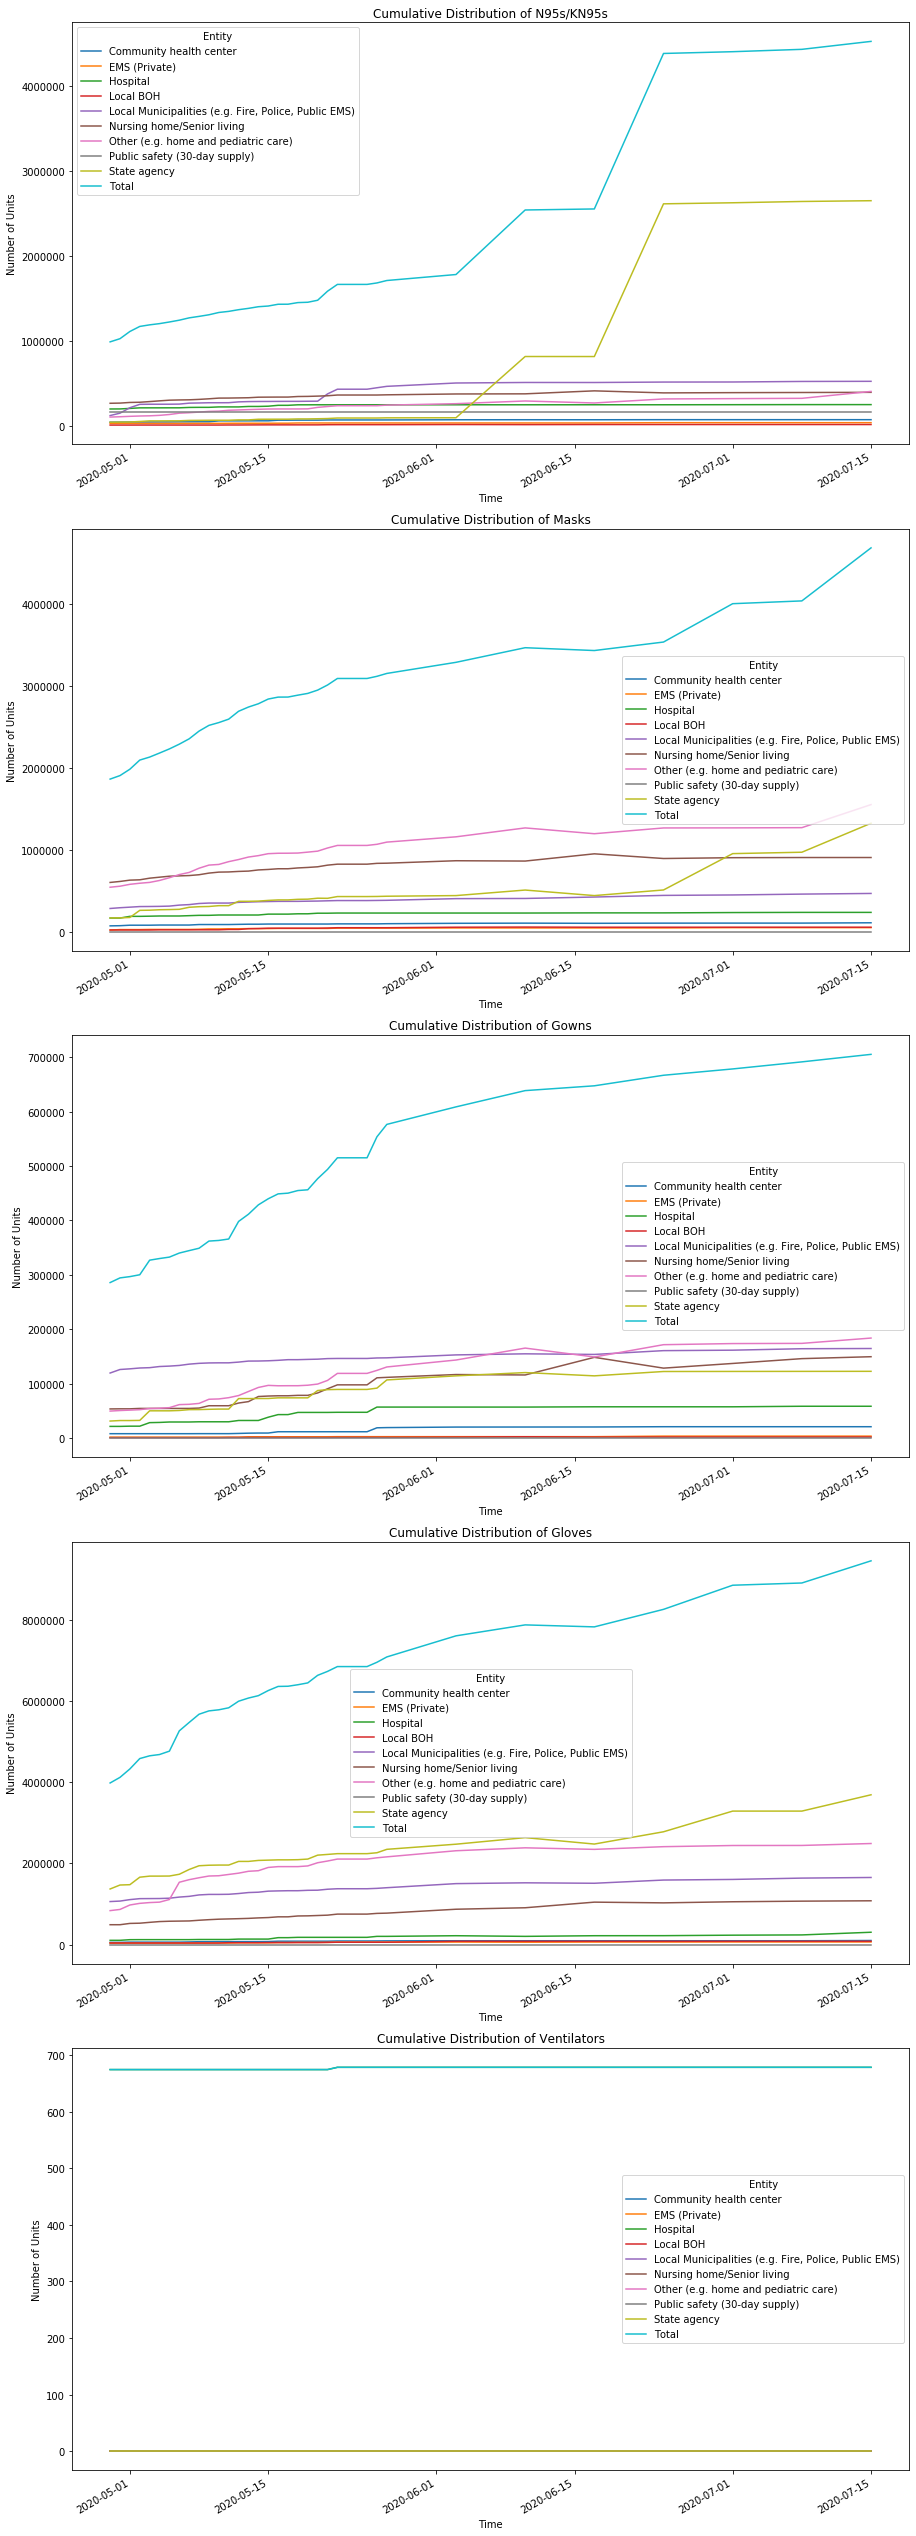

In [4]:
# Cumulative distribution of PPE by entities for Massachusetts
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
fig, axs = plt.subplots(5, 1, figsize=(15,50))
MA_df = [pd.DataFrame()]*5
for i in categories:
    index = categories.index(i)
    axs[index].set_ylabel('Number of Units')
    axs[index].set_title('Cumulative Distribution of {}'.format(i))
    MA_df[index] = MA[['Entity',i]].pivot(columns='Entity', values=i).astype(float)
    MA_df[index].plot(ax=axs[index])

### The most needed categories for Massachusetts:
- #### Gloves: 9 million
- #### N95s/KN95s: 4.5 million
- #### Masks: 4 million


### Entities with the most PPE distributions:
- #### N95s/KN95s: 
    - State Agency
    - Nursing home/Senior living
    - Local Municipalities (e.g. Fire, Police, Public EMS)
- #### Masks:
    - Other
    - State Agency
    - Nursing home/Senior living
- #### Gowns:
    - Local Municipalities (e.g. Fire, Police, Public EMS)
    - Other
    - Nursing home/Senior living
- #### Gloves:
    - State agency
    - Other
    - Local Municipalities (e.g. Fire, Police, Public EMS)
- #### Ventilators:
    - Hospitals
 
#### Note: Those state agencies which are not linked to specific geographies are tagged as state agencies. The "other" category includes all entities that cannot be classified as one of the 8 entity types.

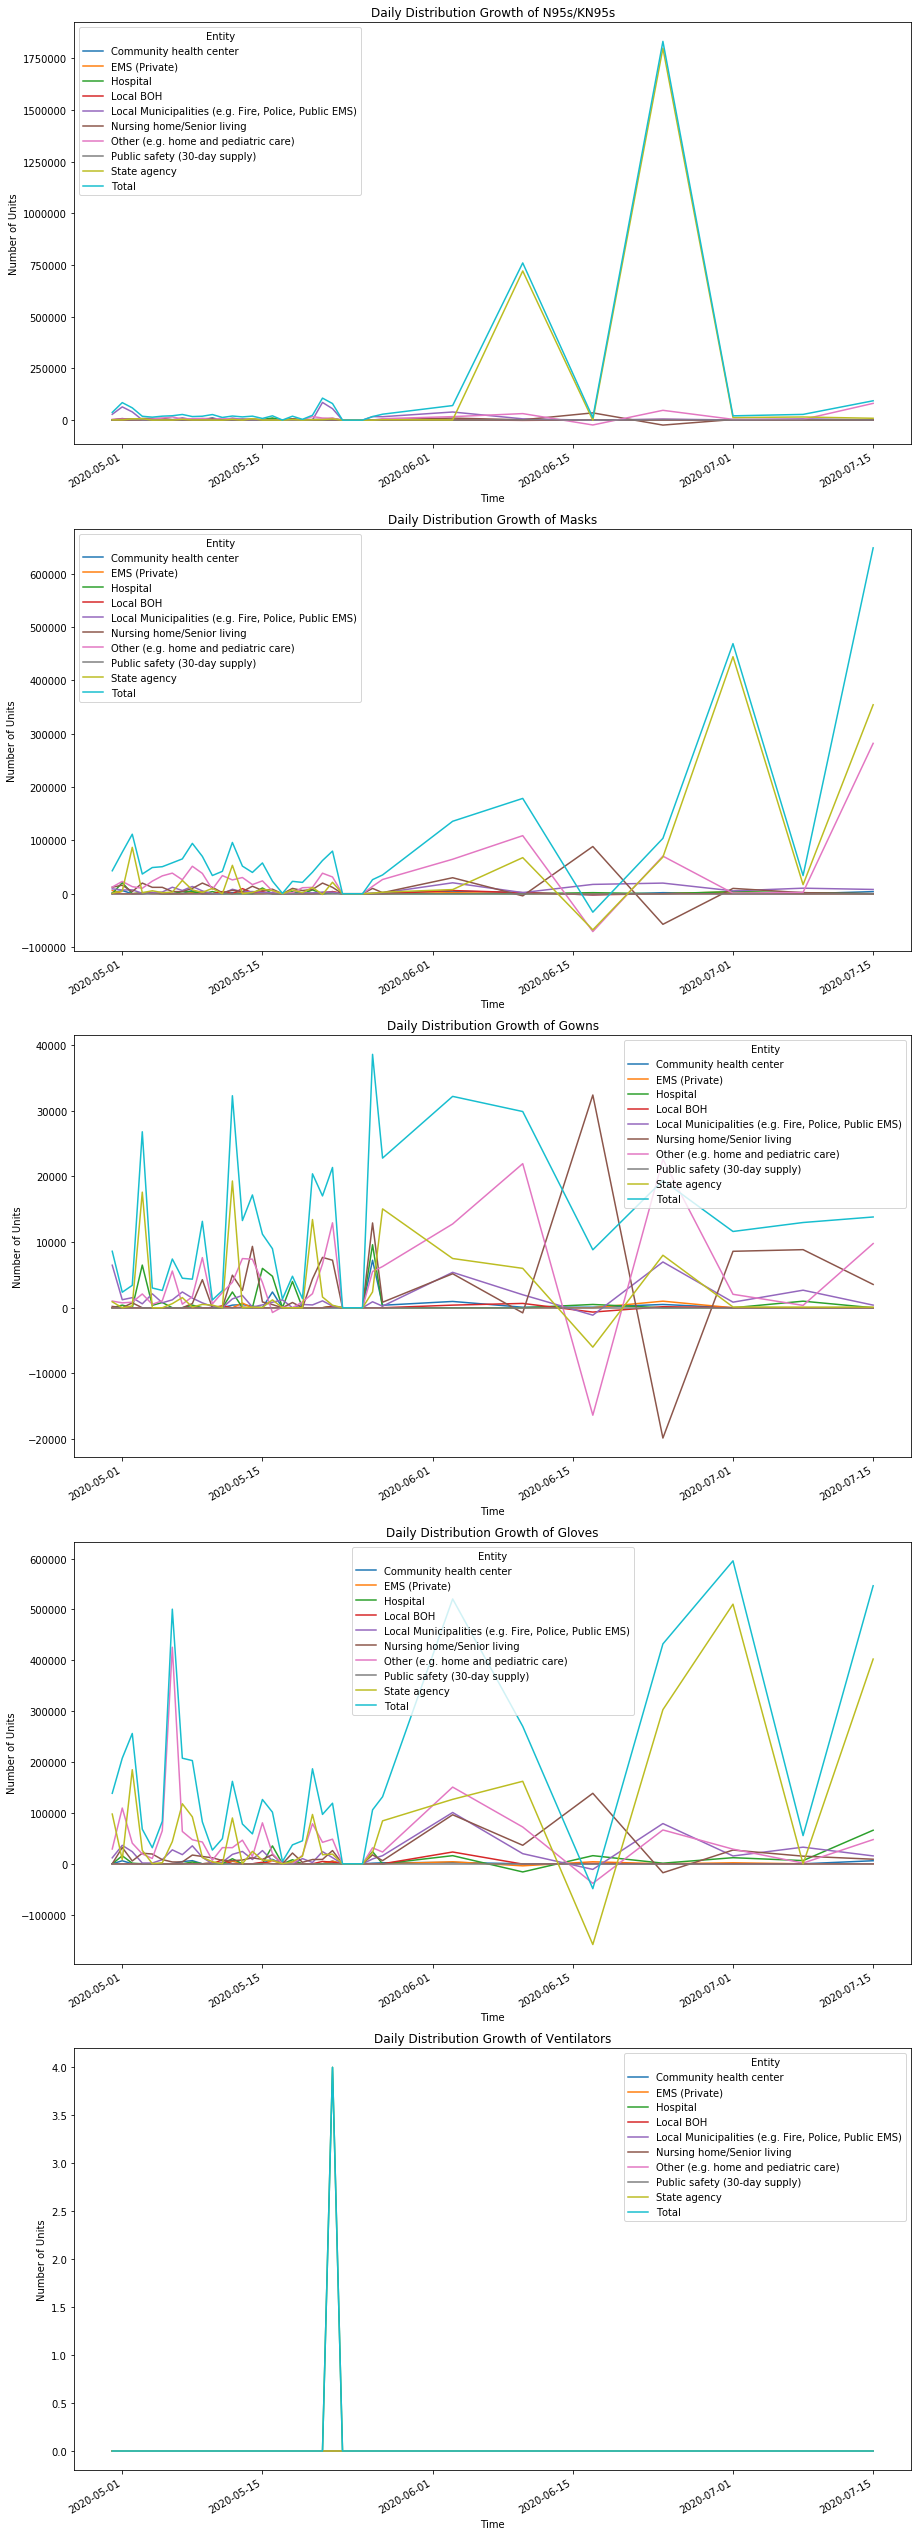

In [5]:
# Daily distribution growth of PPE by entities
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
fig, axs = plt.subplots(5, 1, figsize=(15,50))
MA_df = [pd.DataFrame()]*5
for i in categories:
    index = categories.index(i)
    axs[index].set_ylabel('Number of Units')
    axs[index].set_title('Daily Distribution Growth of {}'.format(i))
    MA_df[index] = MA[['Entity',i]].pivot(columns='Entity', values=i).astype(float).diff().dropna()
    MA_df[index].plot(ax=axs[index])

## Region: ##
- Western Massachusetts
- Central Massachusetts
- Northeastern Massachusetts
- Metro West
- Southeastern Massachusetts
- Metro Boston

<div>
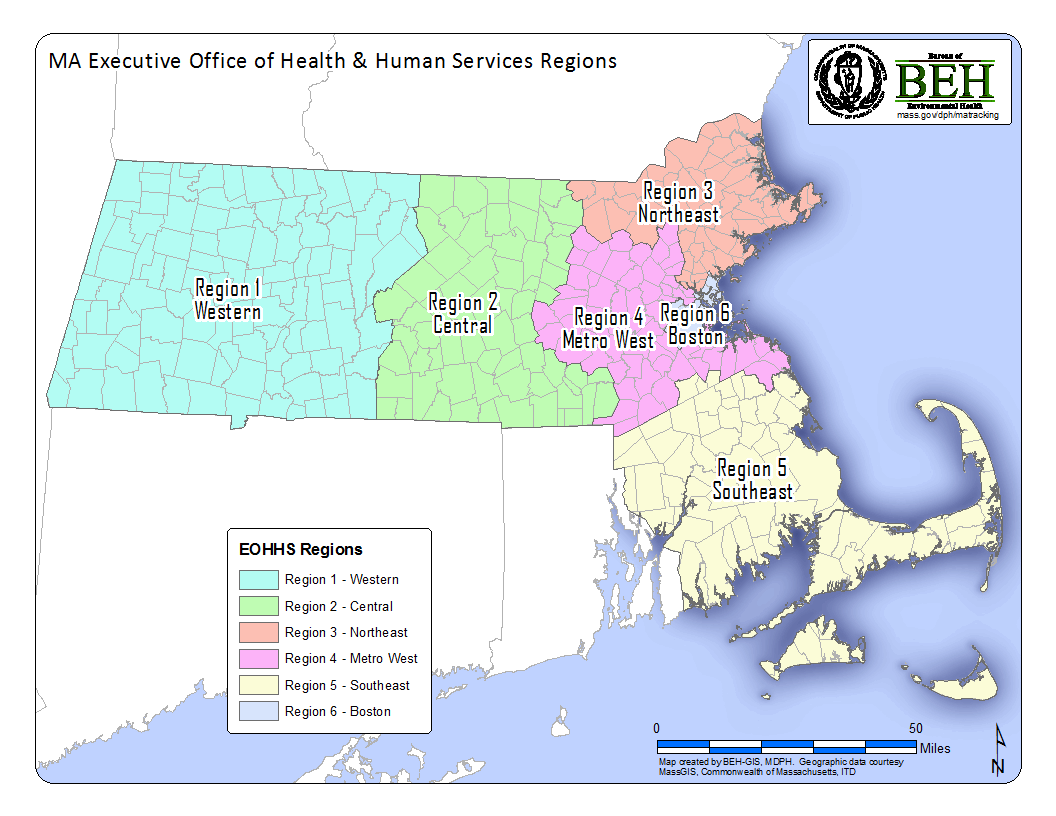
</div>

In [6]:
Region = df[df['Entity']=='Total']

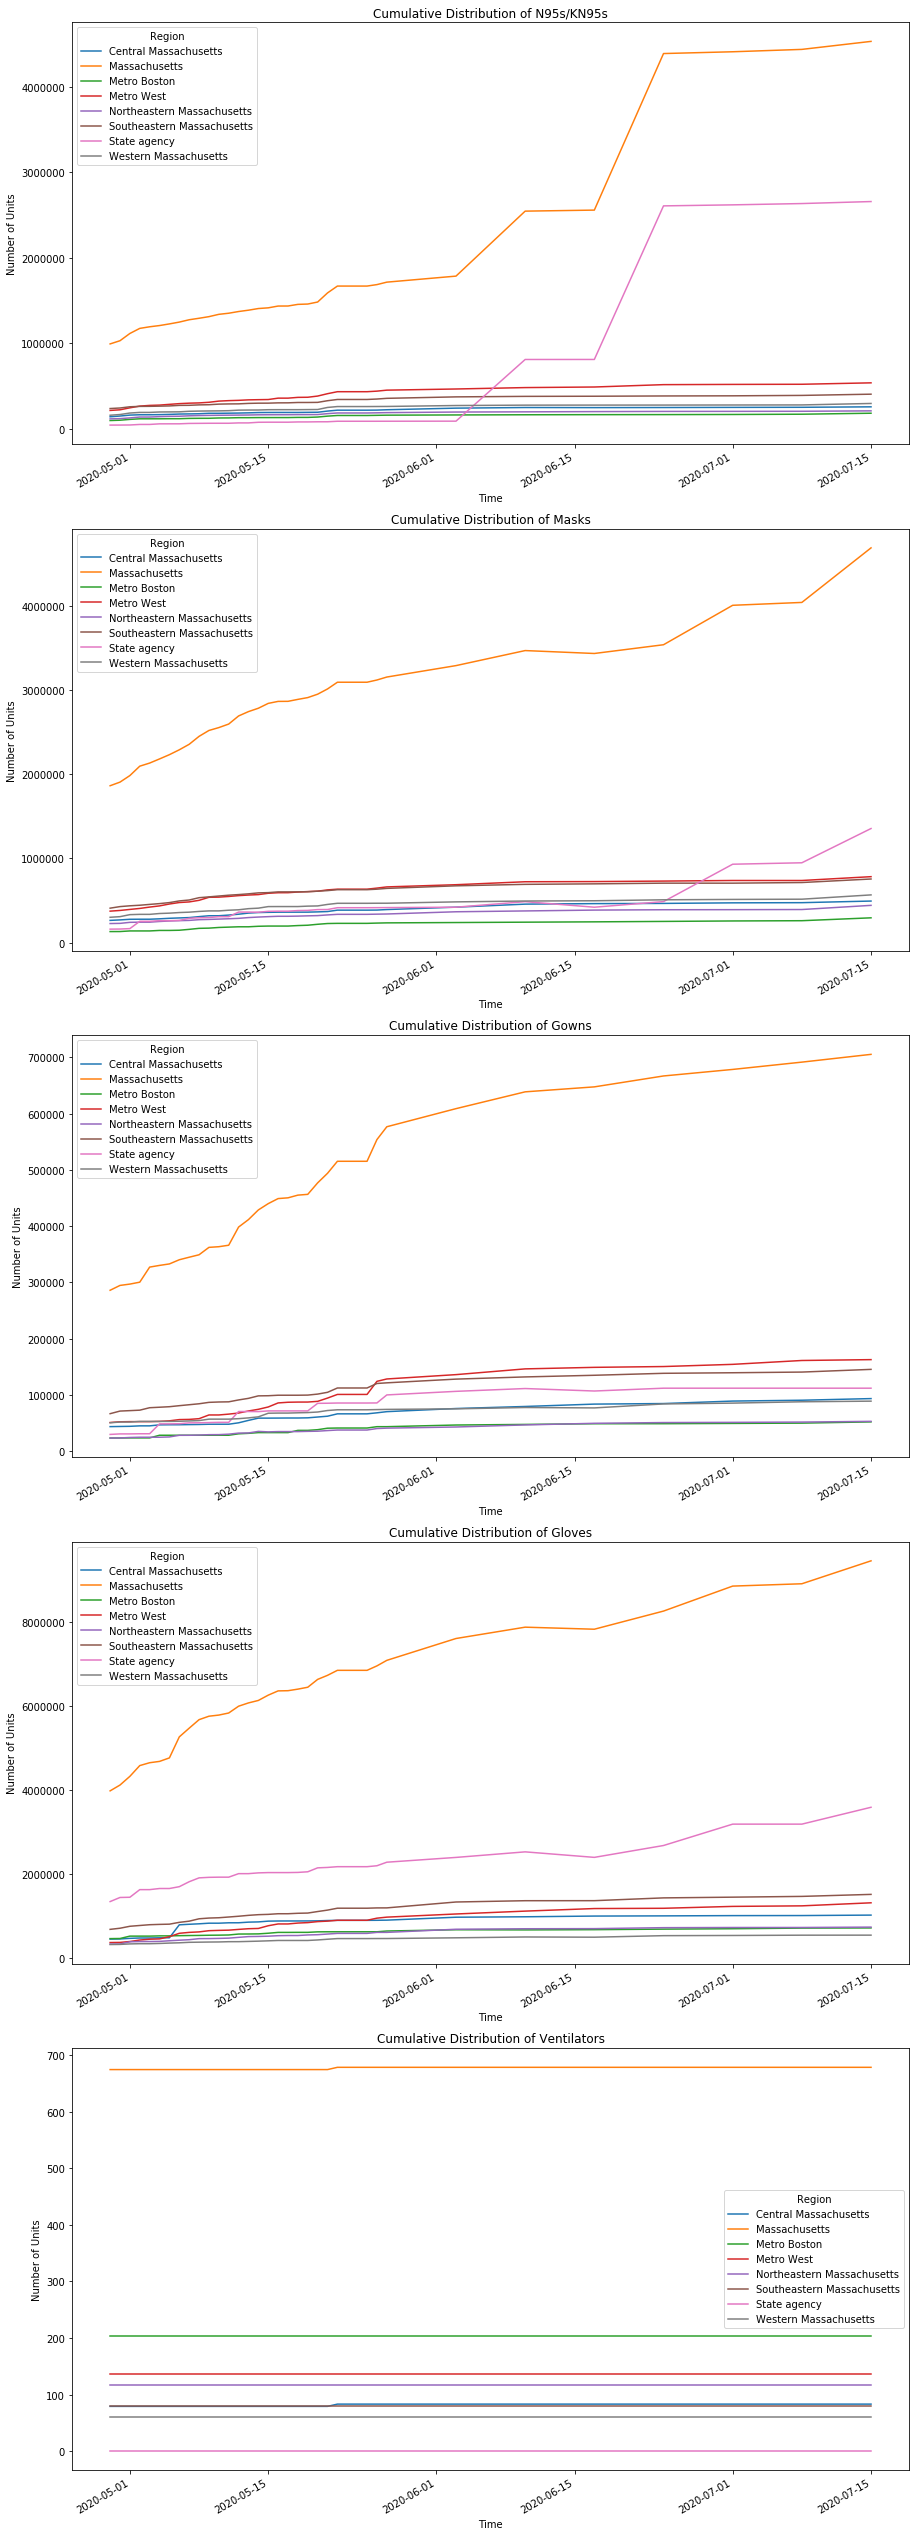

In [7]:
# Cumulative distribution of PPE by Regions
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
fig, axs = plt.subplots(5, 1, figsize=(15,50))
Region_df = [pd.DataFrame()]*5
for i in categories:
    index = categories.index(i)
    axs[index].set_ylabel('Number of Units')
    axs[index].set_title('Cumulative Distribution of {}'.format(i))
    Region_df[index] = Region[['Region',i]].pivot(columns='Region', values=i).astype(float)
    Region_df[index].plot(ax=axs[index])

### Regions with the most PPE distributions:
<div>
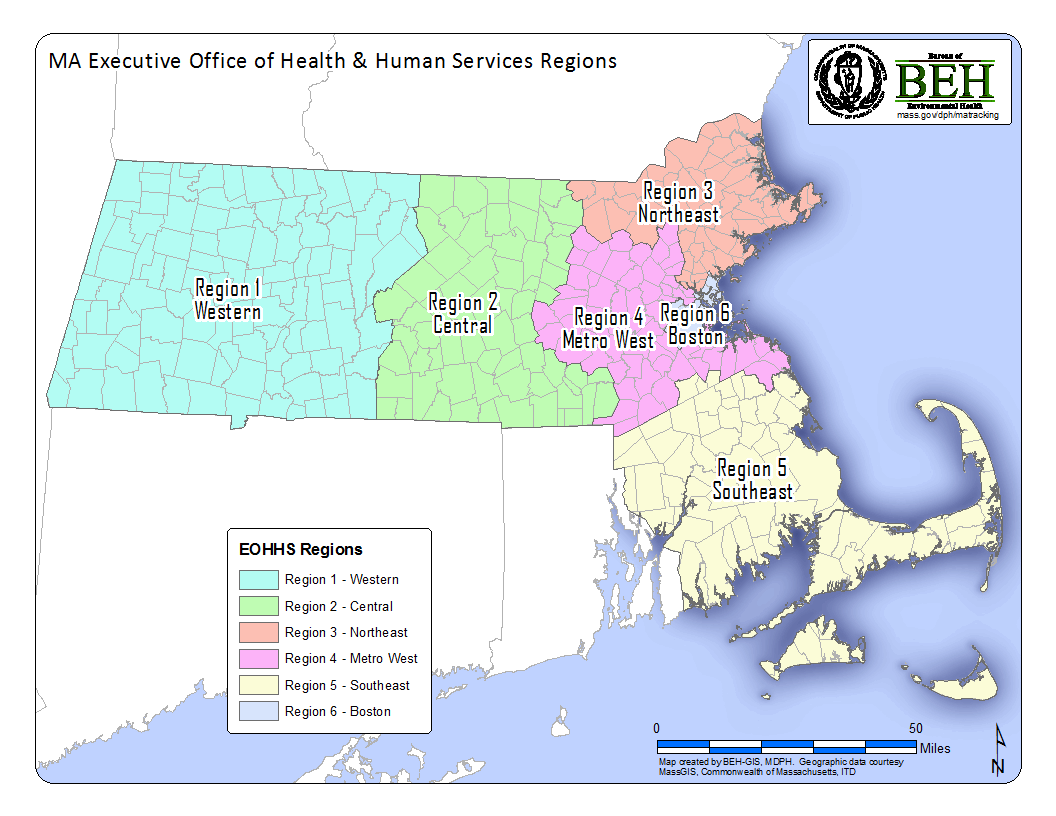
</div>

- #### N95s/KN95s:
    - State Agency
    - Metro West
    - Southeastern Massachusetts
- #### Masks:
    - State Agency
    - Metro West
    - Southeastern Massachusetts
- #### Gowns:
    - Metro West
    - Southeastern Massachusetts
    - State Agency
- #### Gloves:
    - State agency
    - Southeastern Massachusetts
    - Metro West
- #### Ventilators:
    - Metro Boston
    - Metro West
    - Northeastern Massachusetts


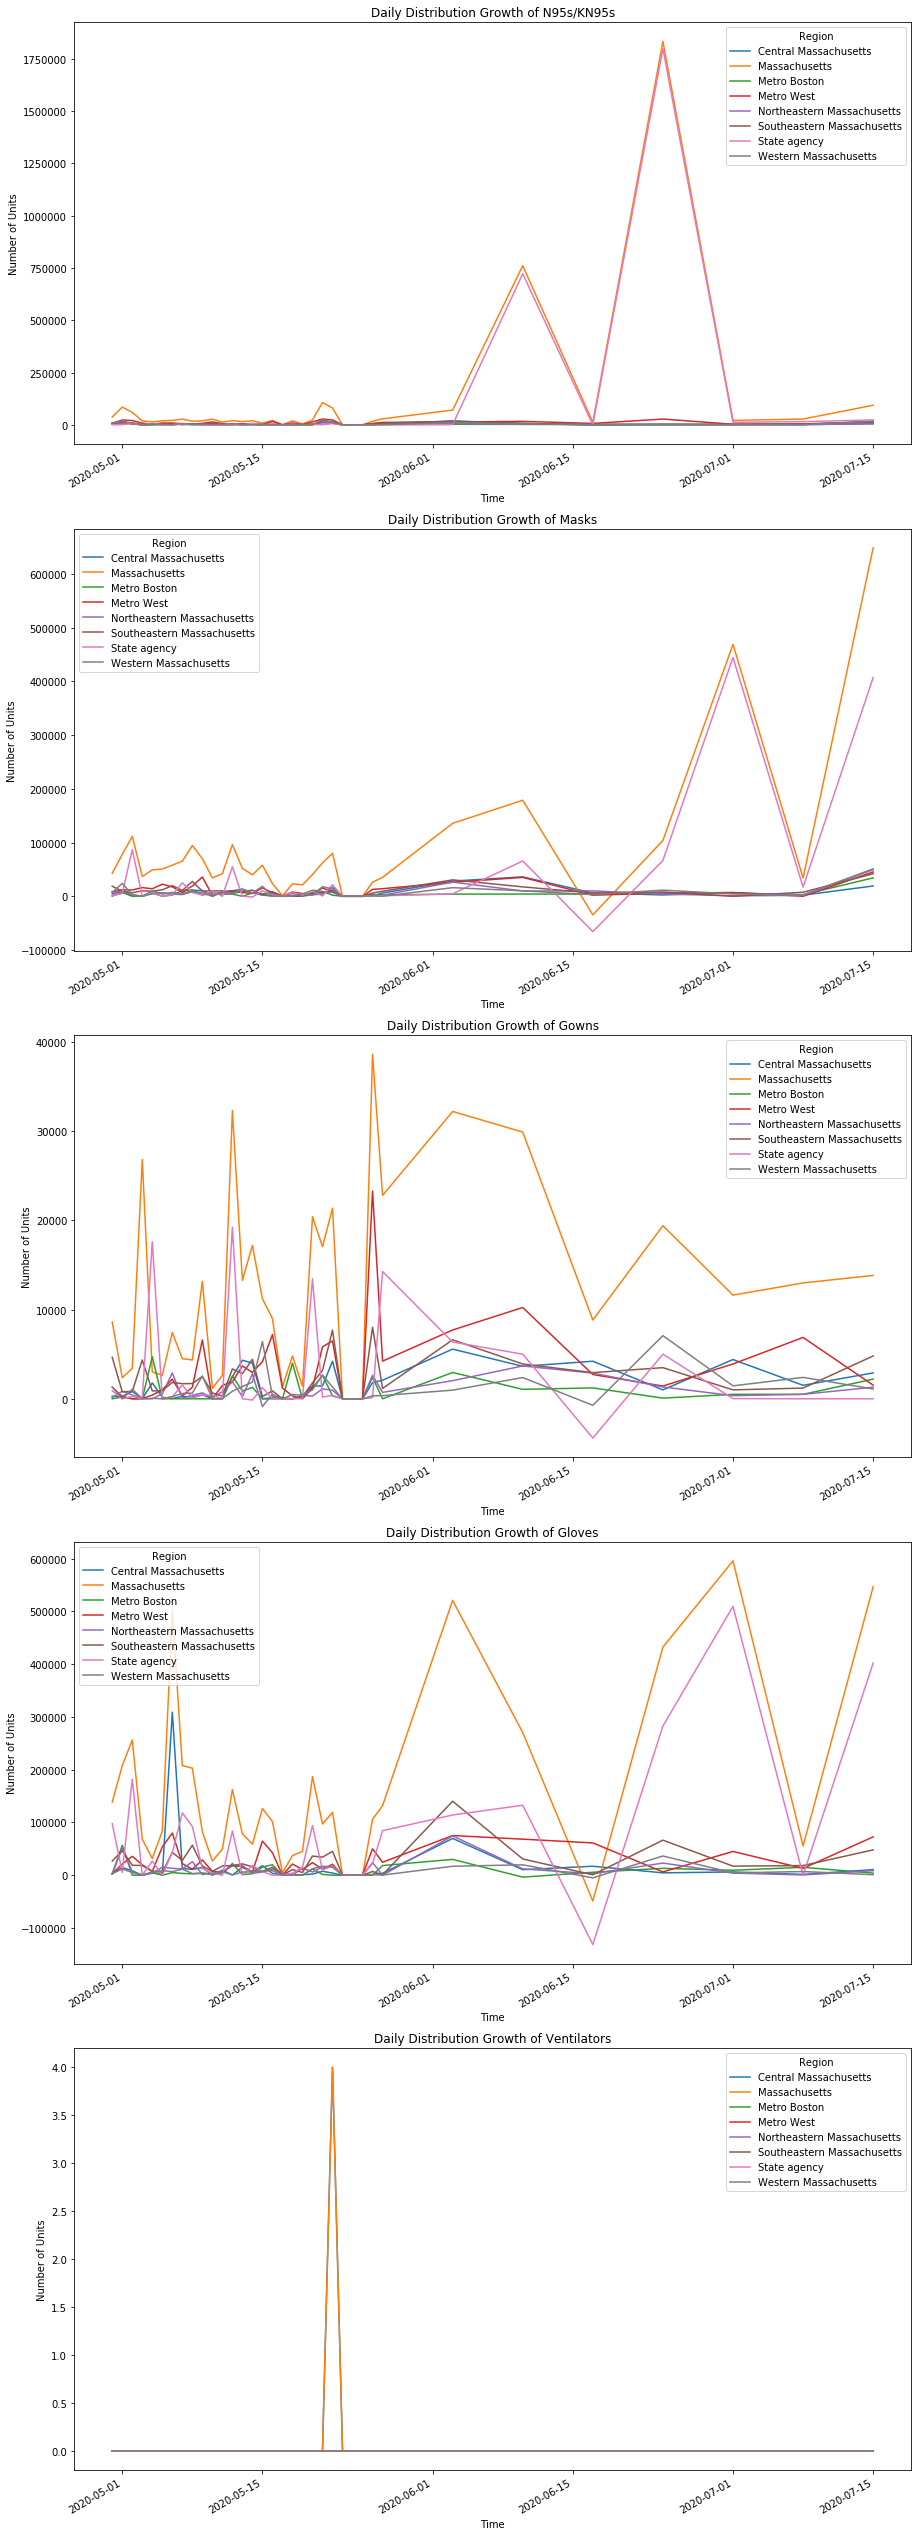

In [8]:
# Daily distribution growth of PPE by Regions
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
fig, axs = plt.subplots(5, 1, figsize=(15,50))
Region_df = [pd.DataFrame()]*5
for i in categories:
    index = categories.index(i)
    axs[index].set_ylabel('Number of Units')
    axs[index].set_title('Daily Distribution Growth of {}'.format(i))
    Region_df[index] = Region[['Region',i]].pivot(columns='Region', values=i).astype(float).diff().dropna()
    Region_df[index].plot(ax=axs[index])

# Western Massachusetts

In [9]:
WM = df[df['Region']=='Western Massachusetts']
WM

,Region,Entity,N95s/KN95s,Masks,Gowns,Gloves,Ventilators
Time,,,,,,,
2020-04-29,Western Massachusetts,Nursing home/Senior living,46860,112350,9472,67800,0
2020-04-29,Western Massachusetts,Hospital,26160,30700,4004,0,60
2020-04-29,Western Massachusetts,Community health center,5360,10100,990,11000,0
2020-04-29,Western Massachusetts,"Local Municipalities (e.g. Fire, Police, Publi...",18508,69142,24962,126880,0
2020-04-29,Western Massachusetts,Public safety (30-day supply),33015,0,0,0,0
...,...,...,...,...,...,...,...
2020-07-15,Western Massachusetts,EMS (Private),9400,14500,1102,32400,0
2020-07-15,Western Massachusetts,Local BOH,2805,11600,300,5000,0
2020-07-15,Western Massachusetts,State agency,780,4500,350,4400,0


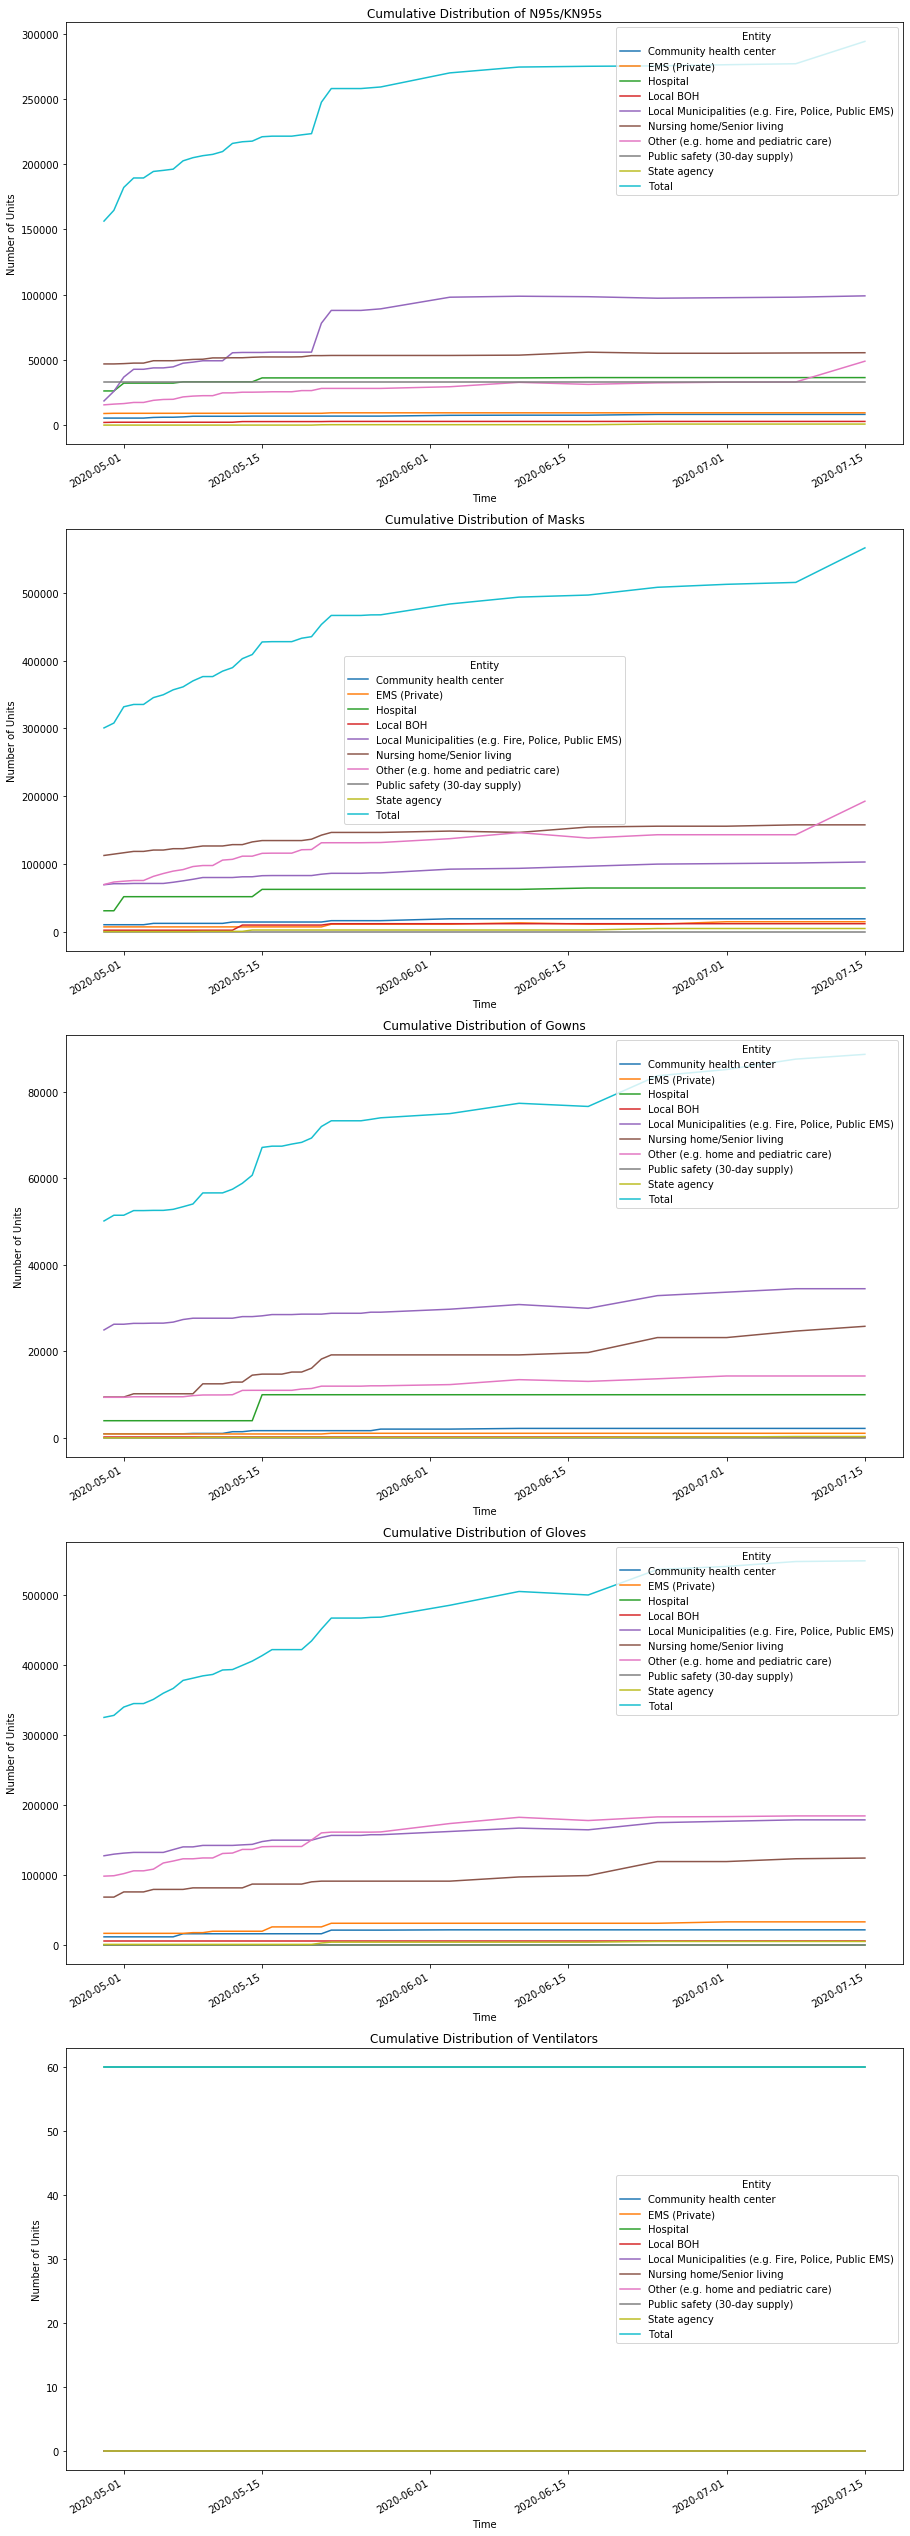

In [10]:
# Cumulative distribution of PPE by entities for Western Massachusetts
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
fig, axs = plt.subplots(5, 1, figsize=(15,50))
WM_df = [pd.DataFrame()]*5
for i in categories:
    index = categories.index(i)
    axs[index].set_ylabel('Number of Units')
    axs[index].set_title('Cumulative Distribution of {}'.format(i))
    WM_df[index] = WM[['Entity',i]].pivot(columns='Entity', values=i).astype(float)
    WM_df[index].plot(ax=axs[index])

# Central Massachusetts

In [11]:
CM = df[df['Region']=='Central Massachusetts']
CM

,Region,Entity,N95s/KN95s,Masks,Gowns,Gloves,Ventilators
Time,,,,,,,
2020-04-29,Central Massachusetts,Nursing home/Senior living,34540,91000,5229,78000,0
2020-04-29,Central Massachusetts,Hospital,22960,11600,1266,0,79
2020-04-29,Central Massachusetts,Community health center,8420,20100,1158,12000,0
2020-04-29,Central Massachusetts,"Local Municipalities (e.g. Fire, Police, Publi...",33695,43184,26099,201350,0
2020-04-29,Central Massachusetts,Public safety (30-day supply),14450,0,0,0,0
...,...,...,...,...,...,...,...
2020-07-15,Central Massachusetts,EMS (Private),3800,3300,900,5000,0
2020-07-15,Central Massachusetts,Local BOH,2060,9000,490,18000,0
2020-07-15,Central Massachusetts,State agency,2000,4300,800,400,0


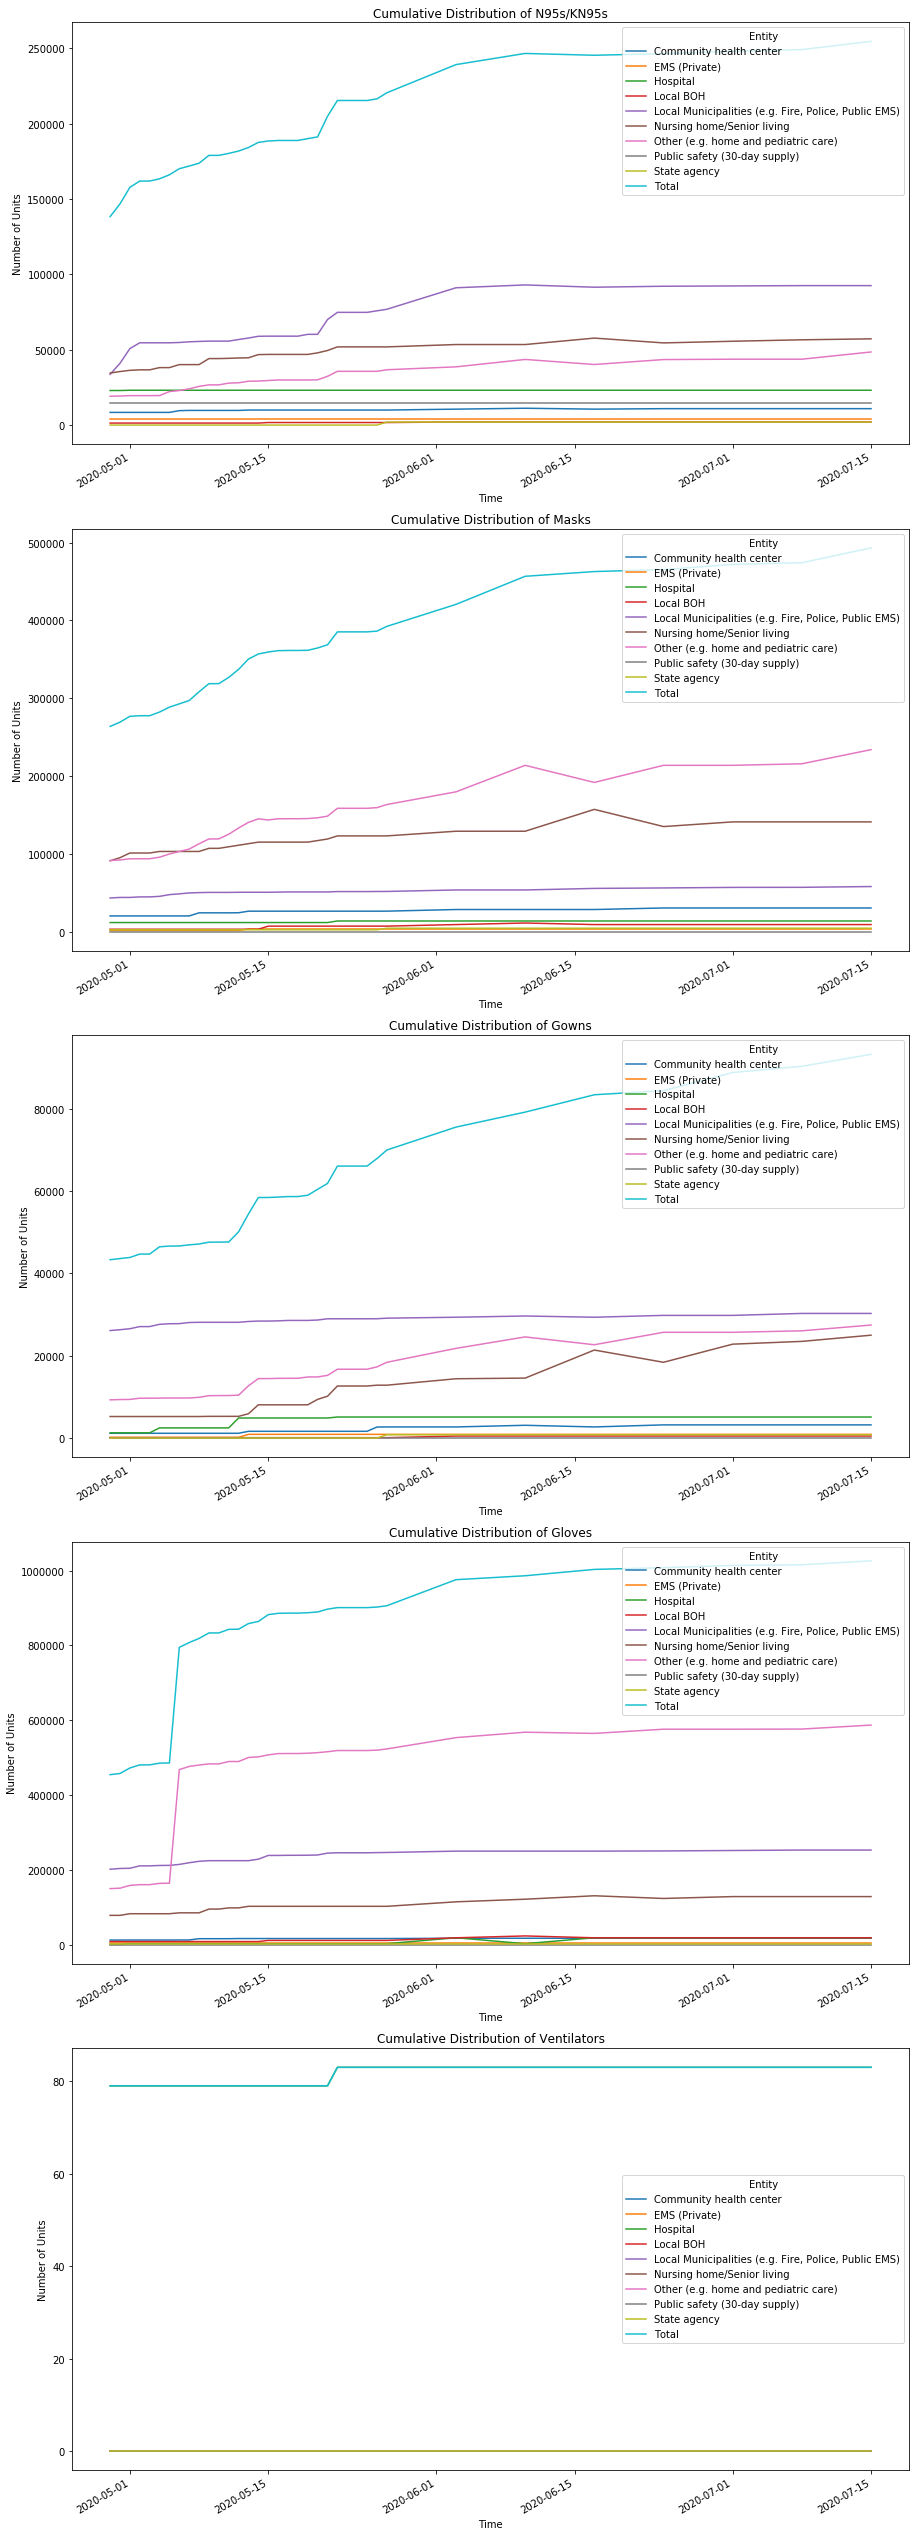

In [12]:
# Cumulative distribution of PPE by entities for Central Massachusetts
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
fig, axs = plt.subplots(5, 1, figsize=(15,50))
CM_df = [pd.DataFrame()]*5
for i in categories:
    index = categories.index(i)
    axs[index].set_ylabel('Number of Units')
    axs[index].set_title('Cumulative Distribution of {}'.format(i))
    CM_df[index] = CM[['Entity',i]].pivot(columns='Entity', values=i).astype(float)
    CM_df[index].plot(ax=axs[index])

# Northeastern Massachusetts

In [13]:
NM = df[df['Region']=='Northeastern Massachusetts']
NM

,Region,Entity,N95s/KN95s,Masks,Gowns,Gloves,Ventilators
Time,,,,,,,
2020-04-29,Northeastern Massachusetts,Nursing home/Senior living,33885,91900,6766,64200,0
2020-04-29,Northeastern Massachusetts,Hospital,24570,30800,1842,8000,117
2020-04-29,Northeastern Massachusetts,Community health center,1680,3300,396,5000,0
2020-04-29,Northeastern Massachusetts,"Local Municipalities (e.g. Fire, Police, Publi...",7630,31208,9991,164800,0
2020-04-29,Northeastern Massachusetts,Public safety (30-day supply),32820,0,0,0,0
...,...,...,...,...,...,...,...
2020-07-15,Northeastern Massachusetts,EMS (Private),2000,6900,120,10200,0
2020-07-15,Northeastern Massachusetts,Local BOH,2720,6000,80,9200,0
2020-07-15,Northeastern Massachusetts,State agency,0,0,400,0,0


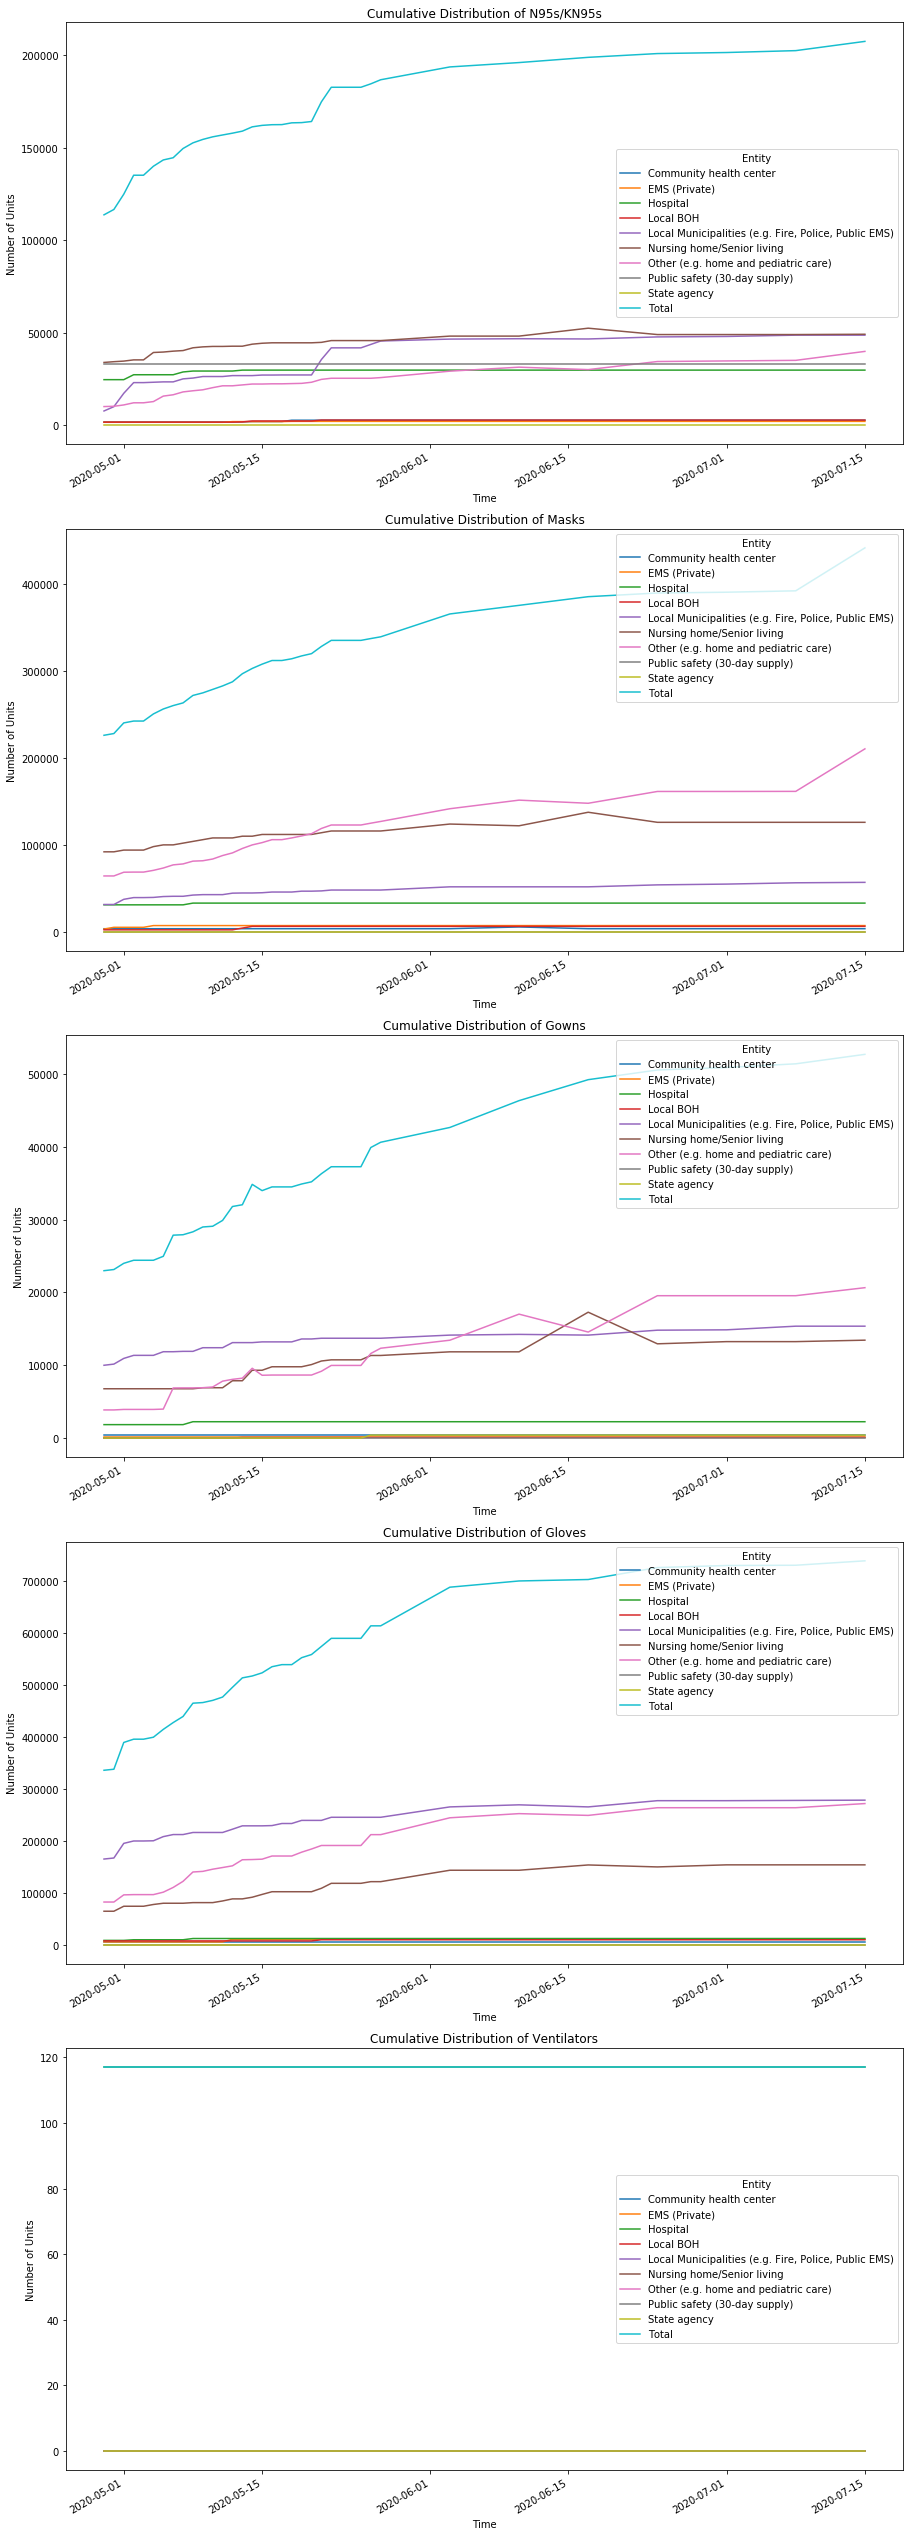

In [14]:
# Cumulative distribution of PPE by entities for Northeastern Massachusetts
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
fig, axs = plt.subplots(5, 1, figsize=(15,50))
NM_df = [pd.DataFrame()]*5
for i in categories:
    index = categories.index(i)
    axs[index].set_ylabel('Number of Units')
    axs[index].set_title('Cumulative Distribution of {}'.format(i))
    NM_df[index] = NM[['Entity',i]].pivot(columns='Entity', values=i).astype(float)
    NM_df[index].plot(ax=axs[index])

# Metro West

In [15]:
MW = df[df['Region']=='Metro West']
MW

,Region,Entity,N95s/KN95s,Masks,Gowns,Gloves,Ventilators
Time,,,,,,,
2020-04-29,Metro West,Nursing home/Senior living,64870,129500,11680,84000,0
2020-04-29,Metro West,Hospital,43720,27400,4374,2000,136
2020-04-29,Metro West,Community health center,11580,14350,2154,6000,0
2020-04-29,Metro West,"Local Municipalities (e.g. Fire, Police, Publi...",15370,63402,21388,120180,0
2020-04-29,Metro West,Public safety (30-day supply),42785,0,0,0,0
...,...,...,...,...,...,...,...
2020-07-15,Metro West,EMS (Private),14440,16600,1240,4000,0
2020-07-15,Metro West,Local BOH,1920,17500,160,14200,0
2020-07-15,Metro West,State agency,3683,7200,5290,39100,0


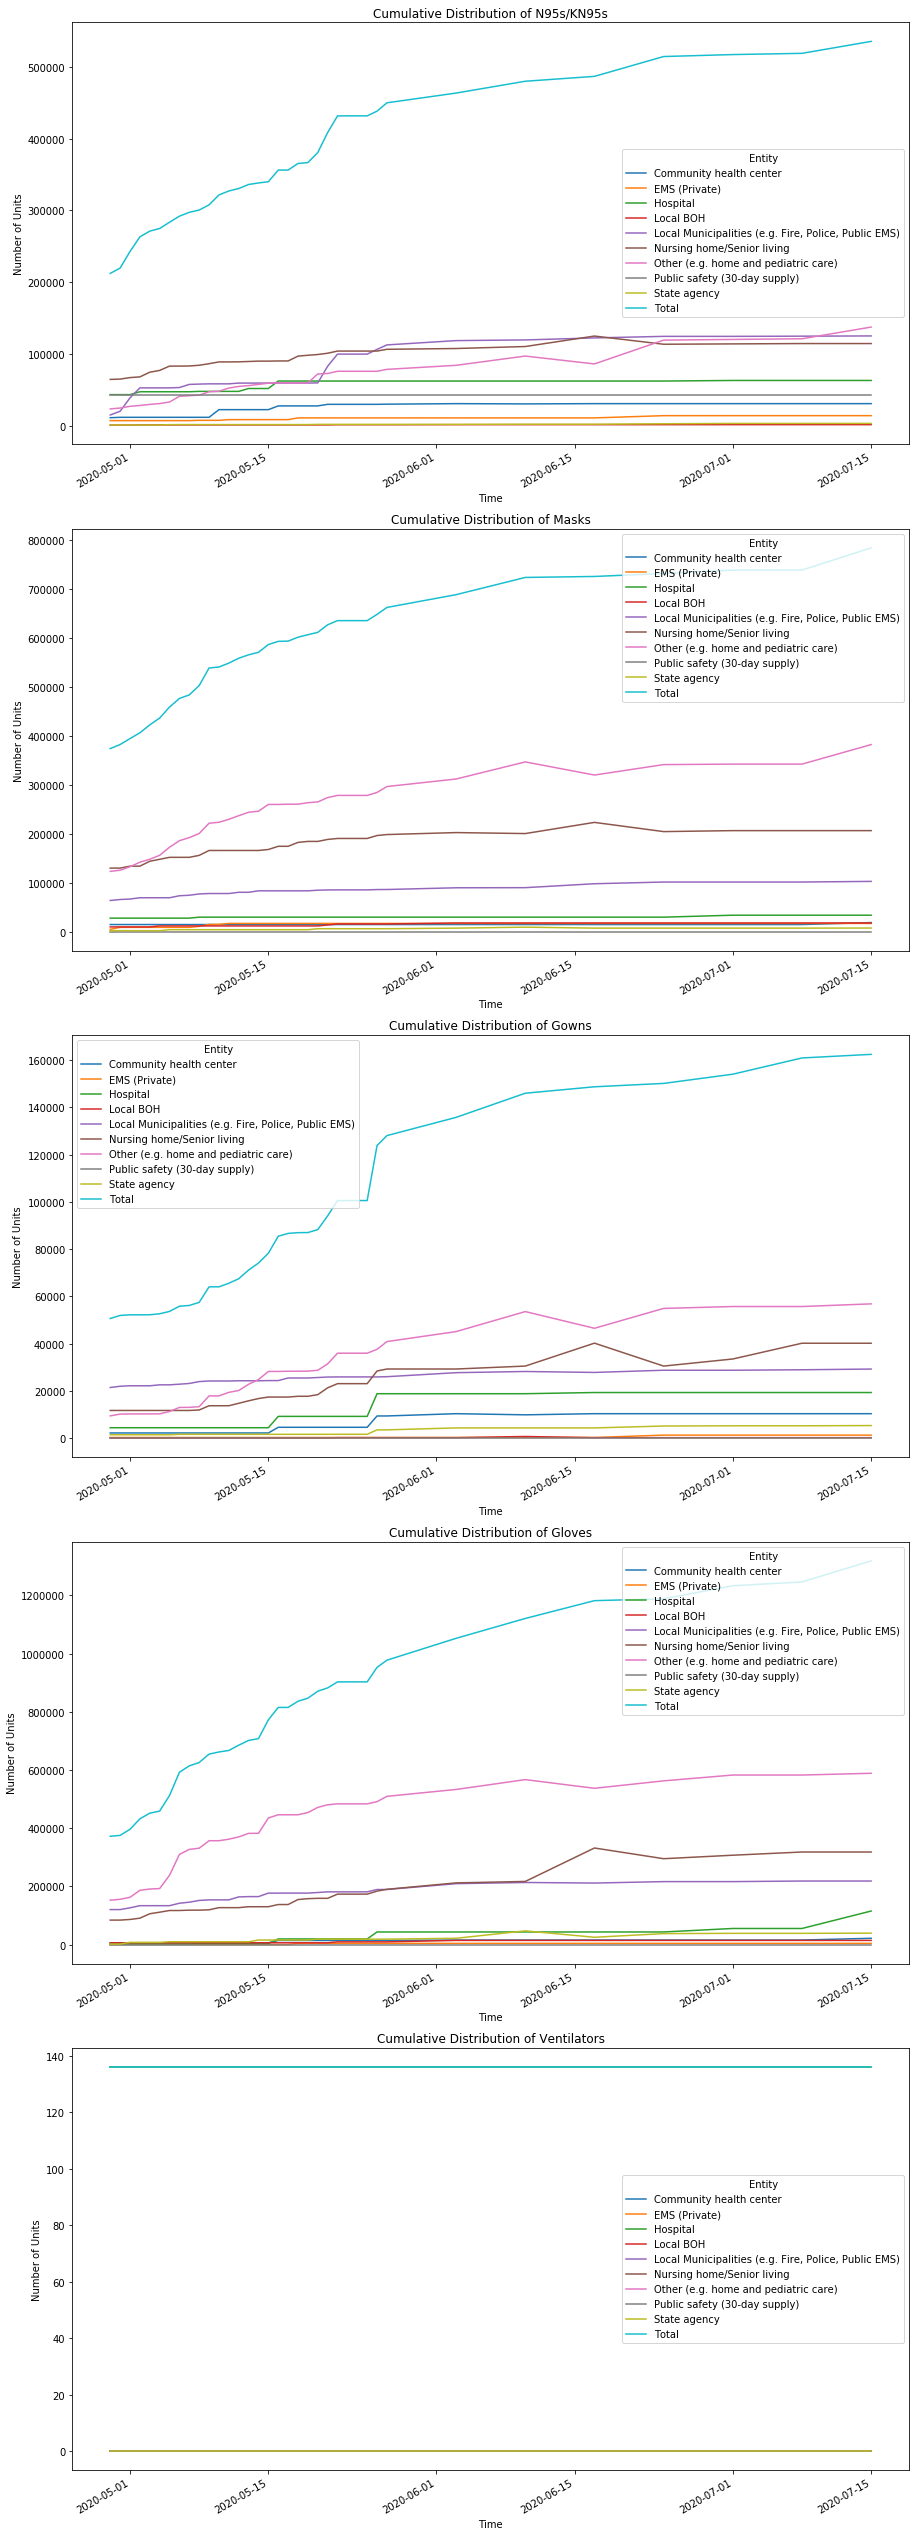

In [16]:
# Cumulative distribution of PPE by entities for Metro West
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
fig, axs = plt.subplots(5, 1, figsize=(15,50))
MW_df = [pd.DataFrame()]*5
for i in categories:
    index = categories.index(i)
    axs[index].set_ylabel('Number of Units')
    axs[index].set_title('Cumulative Distribution of {}'.format(i))
    MW_df[index] = MW[['Entity',i]].pivot(columns='Entity', values=i).astype(float)
    MW_df[index].plot(ax=axs[index])

# Metro Boston

In [17]:
MB = df[df['Region']=='Metro Boston']
MB

,Region,Entity,N95s/KN95s,Masks,Gowns,Gloves,Ventilators
Time,,,,,,,
2020-04-29,Metro Boston,Nursing home/Senior living,14550,46950,2766,25700,0
2020-04-29,Metro Boston,Hospital,31950,22300,2580,47000,204
2020-04-29,Metro Boston,Community health center,9640,14700,3030,17000,0
2020-04-29,Metro Boston,"Local Municipalities (e.g. Fire, Police, Publi...",13920,17200,11150,259120,0
2020-04-29,Metro Boston,Public safety (30-day supply),6455,0,0,0,0
...,...,...,...,...,...,...,...
2020-07-15,Metro Boston,EMS (Private),5000,0,0,0,0
2020-07-15,Metro Boston,Local BOH,3720,1000,300,6000,0
2020-07-15,Metro Boston,State agency,1200,1050,668,24400,0


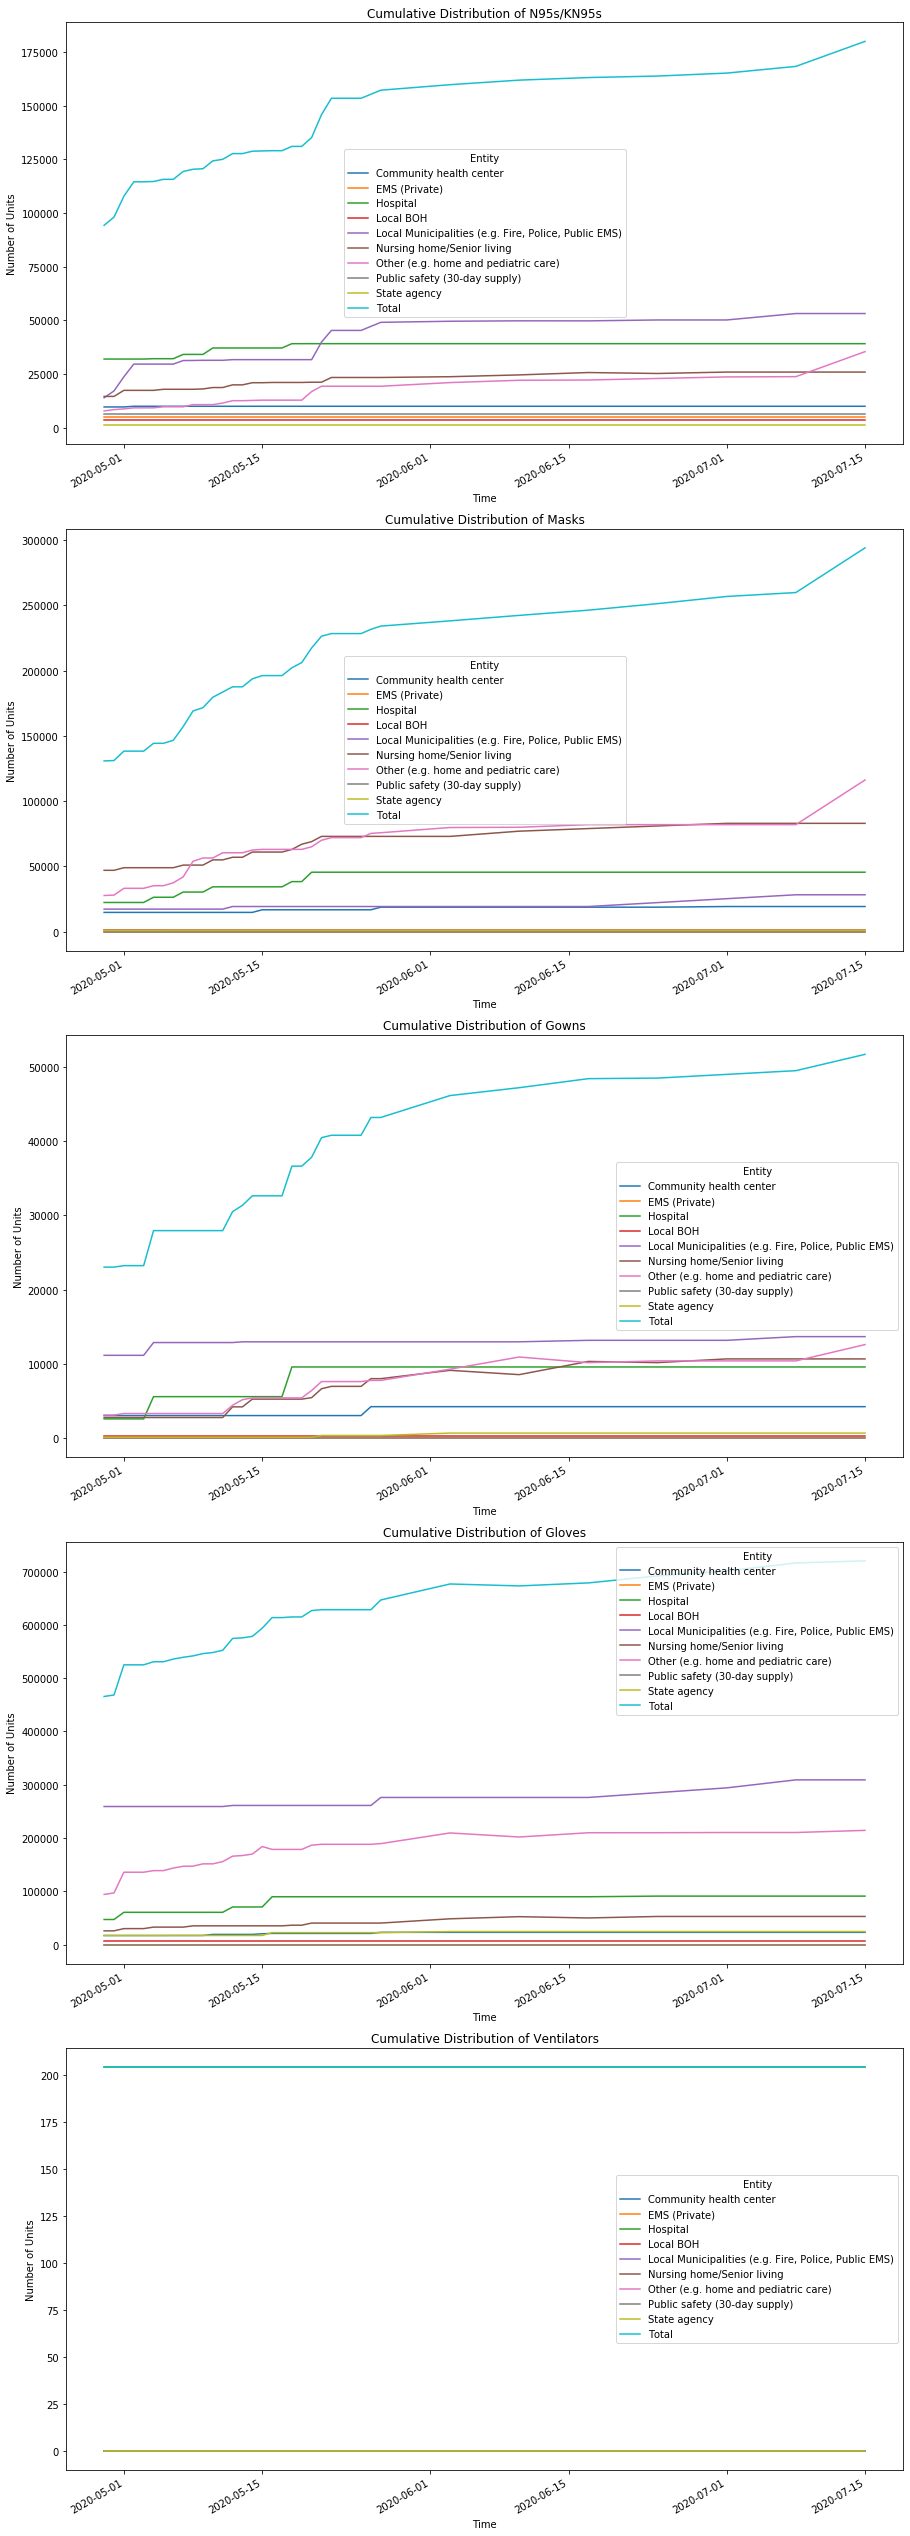

In [18]:
# Cumulative distribution of PPE by entities for Metro Boston
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
fig, axs = plt.subplots(5, 1, figsize=(15,50))
MB_df = [pd.DataFrame()]*5
for i in categories:
    index = categories.index(i)
    axs[index].set_ylabel('Number of Units')
    axs[index].set_title('Cumulative Distribution of {}'.format(i))
    MB_df[index] = MB[['Entity',i]].pivot(columns='Entity', values=i).astype(float)
    MB_df[index].plot(ax=axs[index])

# Southeastern Massachusetts

In [19]:
SM = df[df['Region']=='Southeastern Massachusetts']
SM

,Region,Entity,N95s/KN95s,Masks,Gowns,Gloves,Ventilators
Time,,,,,,,
2020-04-29,Southeastern Massachusetts,Nursing home/Senior living,72580,128700,17612,169400,0
2020-04-29,Southeastern Massachusetts,Hospital,50640,42400,7370,47000,79
2020-04-29,Southeastern Massachusetts,Community health center,7870,7200,285,2400,0
2020-04-29,Southeastern Massachusetts,"Local Municipalities (e.g. Fire, Police, Publi...",33511,58005,25942,188320,0
2020-04-29,Southeastern Massachusetts,Public safety (30-day supply),37800,0,0,0,0
...,...,...,...,...,...,...,...
2020-07-15,Southeastern Massachusetts,EMS (Private),3860,6600,186,12000,0
2020-07-15,Southeastern Massachusetts,Local BOH,3540,8000,556,27600,0
2020-07-15,Southeastern Massachusetts,State agency,3870,6800,3740,31400,0


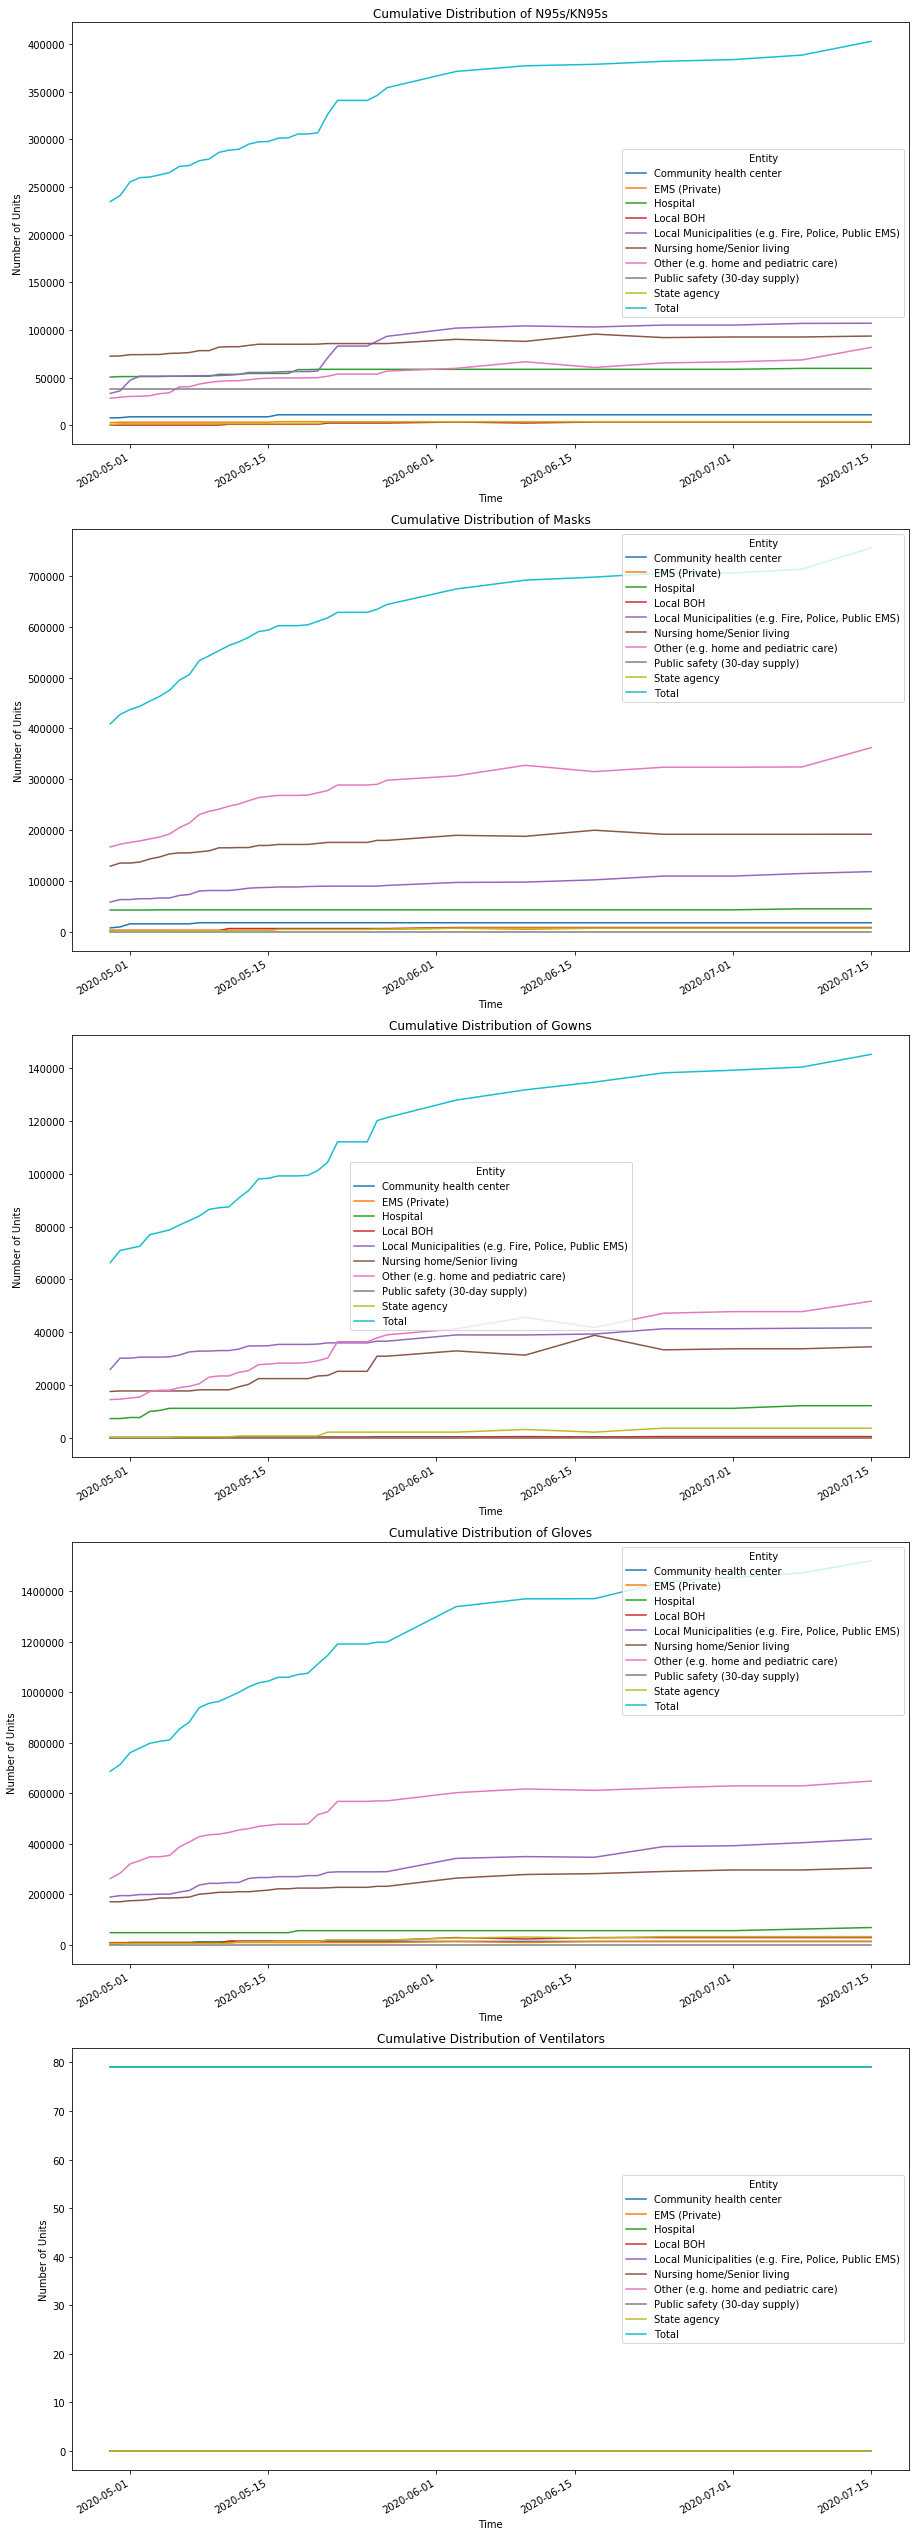

In [20]:
# Cumulative distribution of PPE by entities for Southeastern Massachusetts
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
fig, axs = plt.subplots(5, 1, figsize=(15,50))
SM_df = [pd.DataFrame()]*5
for i in categories:
    index = categories.index(i)
    axs[index].set_ylabel('Number of Units')
    axs[index].set_title('Cumulative Distribution of {}'.format(i))
    SM_df[index] = SM[['Entity',i]].pivot(columns='Entity', values=i).astype(float)
    SM_df[index].plot(ax=axs[index])

# State Agency

In [21]:
SA = df[df['Region']=='State agency']
SA

,Region,Entity,N95s/KN95s,Masks,Gowns,Gloves,Ventilators
Time,,,,,,,
2020-04-29,State agency,Nursing home/Senior living,0,0,0,0,0
2020-04-29,State agency,Hospital,0,0,0,0,0
2020-04-29,State agency,Community health center,0,0,0,0,0
2020-04-29,State agency,"Local Municipalities (e.g. Fire, Police, Publi...",0,0,0,0,0
2020-04-29,State agency,Public safety (30-day supply),0,0,0,0,0
...,...,...,...,...,...,...,...
2020-07-15,State agency,EMS (Private),0,0,0,0,0
2020-07-15,State agency,Local BOH,0,0,0,0,0
2020-07-15,State agency,State agency,2642252,1299986,111408,3595997,0


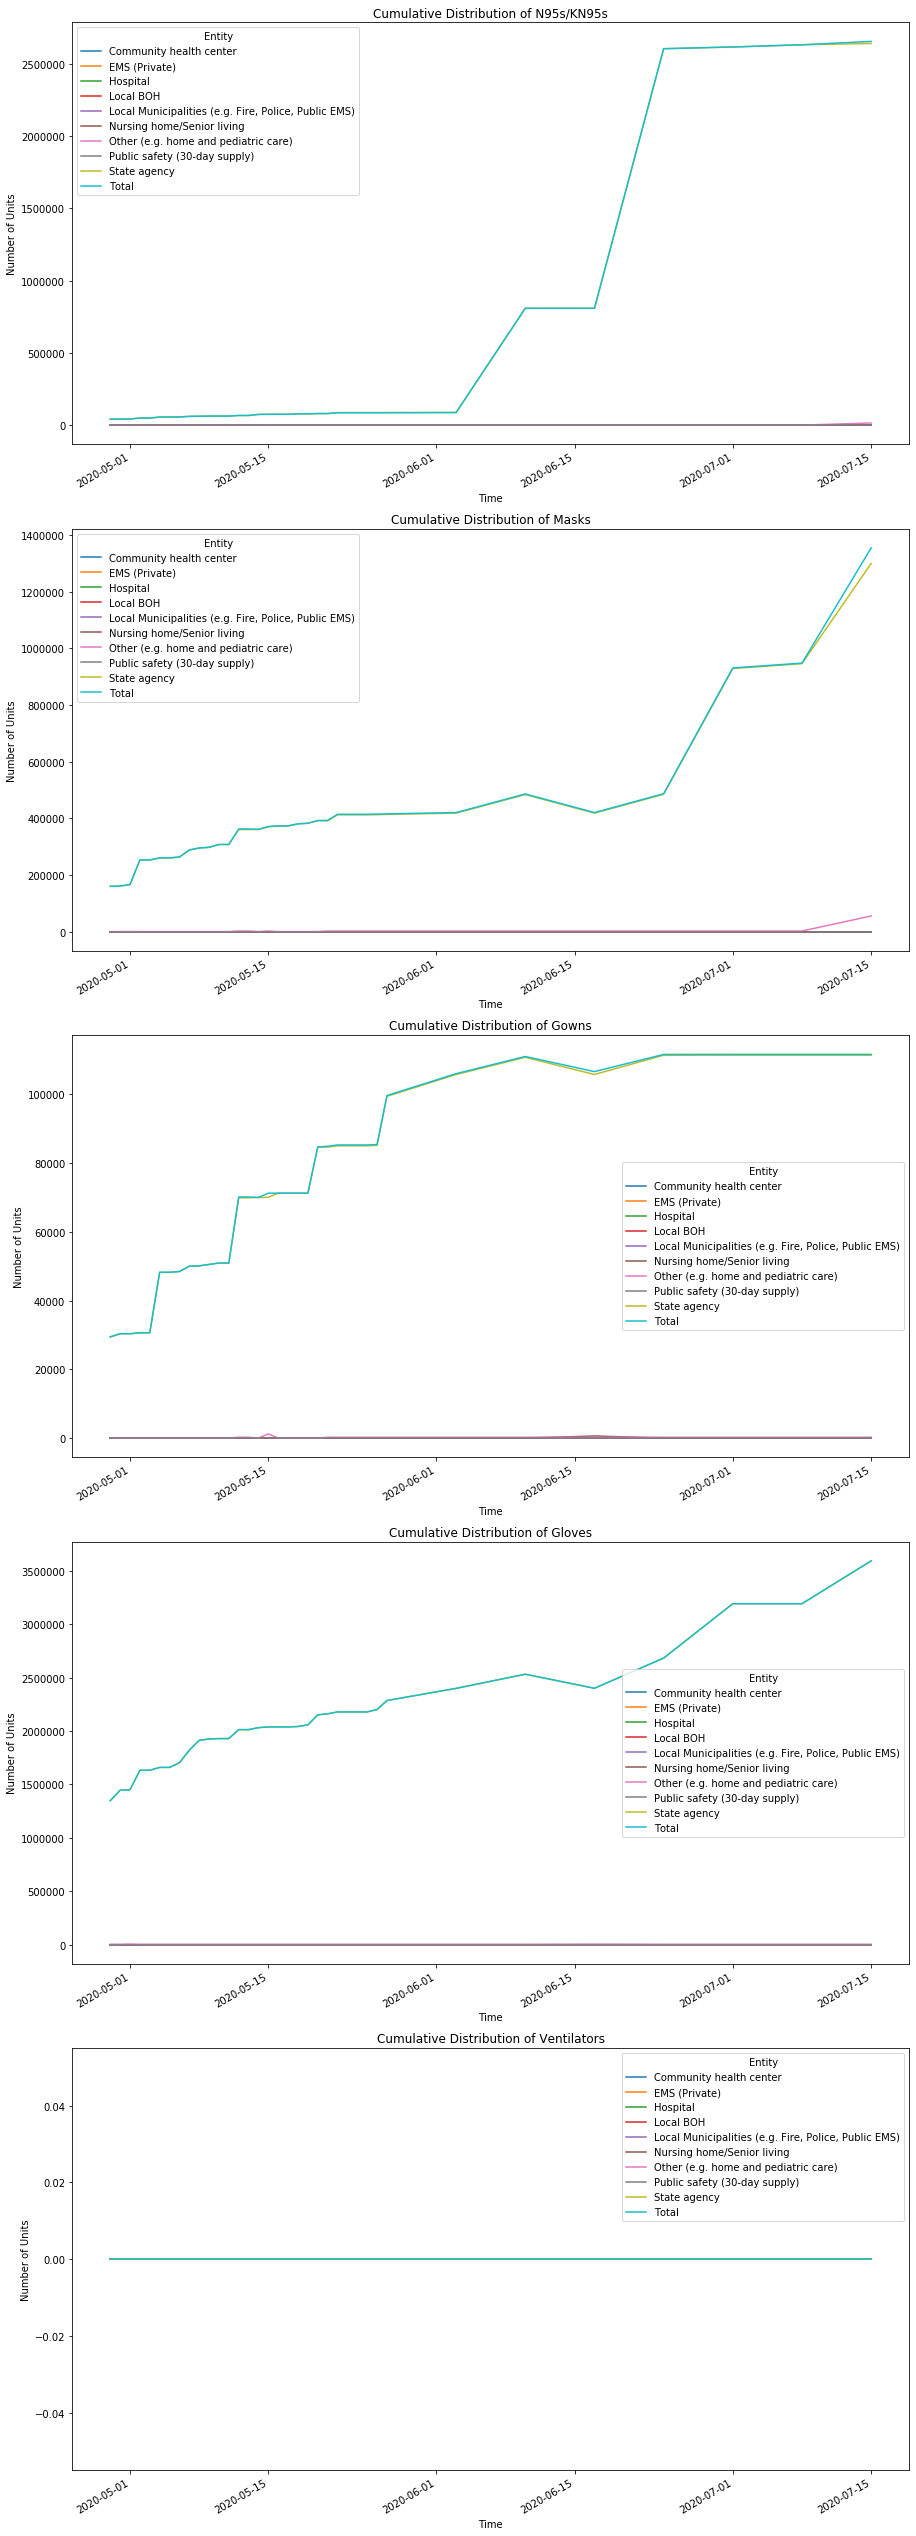

In [22]:
# Cumulative distribution of PPE by entities for State agency
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
fig, axs = plt.subplots(5, 1, figsize=(15,50))
SA_df = [pd.DataFrame()]*5
for i in categories:
    index = categories.index(i)
    axs[index].set_ylabel('Number of Units')
    axs[index].set_title('Cumulative Distribution of {}'.format(i))
    SA_df[index] = SA[['Entity',i]].pivot(columns='Entity', values=i).astype(float)
    SA_df[index].plot(ax=axs[index])